In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('IMG.JPG')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(img)
ax.axis("off")

(-0.5, 3023.5, 3023.5, -0.5)

In [2]:
im_th = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)

(-0.5, 3023.5, 3023.5, -0.5)

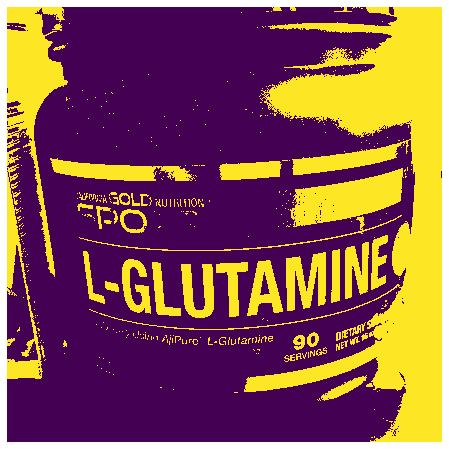

In [3]:
# 画像の読み込み
img = cv2.imread("IMG.jpg", 0)

# 閾値の設定
threshold = 70

# 二値化(閾値100を超えた画素を255にする。)
ret, img_thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_thresh)
ax.axis("off")

(-0.5, 3023.5, 3023.5, -0.5)

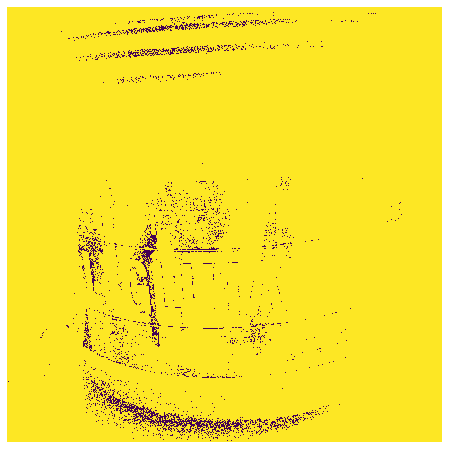

In [4]:
# 画像の読み込み
img = cv2.imread("IMG.jpg", 0)

# 閾値の設定
threshold = 10

# 二値化(閾値100を超えた画素を255にする。)
ret, img_thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_thresh)
ax.axis("off")

(-0.5, 3023.5, 3023.5, -0.5)

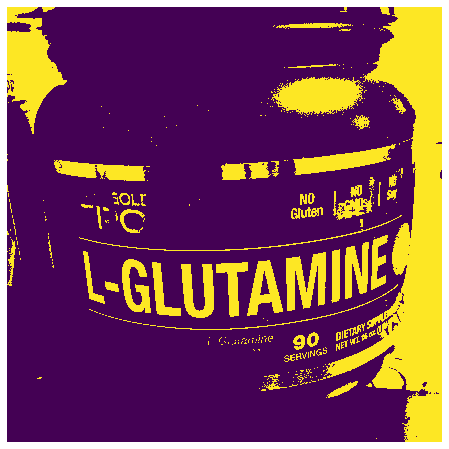

In [5]:
# 閾値の設定
threshold = 100

# 二値化(閾値100を超えた画素を255にする。)
ret, img_thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
cv2.line(img_thresh, (960, 0), (960, 1020), (0, 0, 0), thickness=10, lineType=cv2.LINE_4)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)
ax.imshow(img_thresh)
ax.axis("off")

In [6]:
cv2.imwrite("IMG_re.jpg",img_thresh)

True

In [7]:
blur = cv2.GaussianBlur(img_thresh, (59, 59), 0)

In [8]:
ret1, th1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [9]:
img1 = cv2.imread("IMG_re.jpg")
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [10]:
#輪郭の階層情報
hierarchy

array([[[   1,   -1,   -1,   -1],
        [   2,    0,   -1,   -1],
        [   3,    1,   -1,   -1],
        ...,
        [6627, 6625,   -1,   -1],
        [6628, 6626,   -1,   -1],
        [  -1, 6627,   -1,   -1]]], dtype=int32)

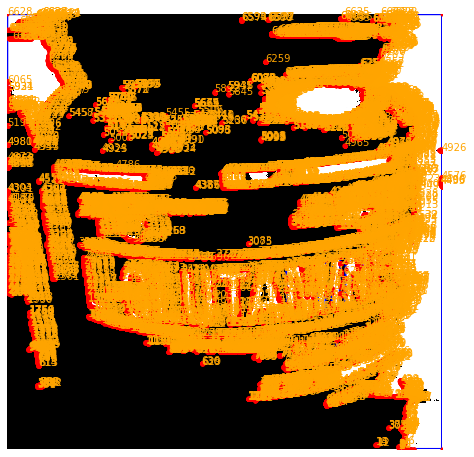

In [11]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def draw_contours(ax, img, contours):
    ax.imshow(img)  # 画像を表示する。
    ax.set_axis_off()
    
    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="orange", size="10")
        

fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(ax, img1, contours)

plt.show()

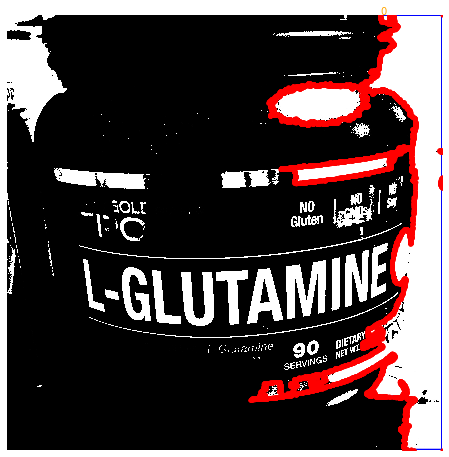

In [12]:
contours.sort(key=lambda x: cv2.contourArea(x), reverse=True)
target_contour = max(contours, key=lambda x: cv2.contourArea(x))

fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(ax, img1, [target_contour])

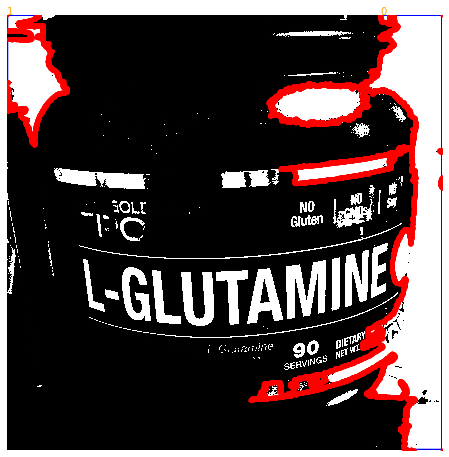

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(ax, img1, [contours[0],contours[1]])

In [14]:
contours[0][1]

array([[2594,    1]], dtype=int32)

In [15]:
#contours[0],contours[1]を両方変数回した
import math
def get_distance(x1, y1, x2, y2):
    d = math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    return d

In [16]:
import numpy as np
aa=np.argmin(contours[0][0:len(contours[0])],axis=0)
bb=np.argmax(contours[1][0:len(contours[1])],axis=0)

2507.7232702194237


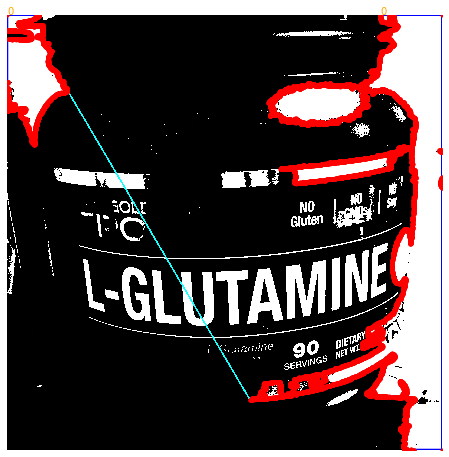

In [17]:
x3 = contours[0][aa[0][0]][0][0]
y3 = contours[0][aa[0][0]][0][1]
x4 = contours[1][bb[0][0]][0][0]
y4 = contours[1][bb[0][0]][0][1]

fig, ax = plt.subplots(figsize=(8, 8))
cv2.line(img1, (x3, y3), (x4, y4), (25, 255, 255), thickness=10, lineType=cv2.LINE_4)
draw_contours(ax, img1, [contours[0]])
draw_contours(ax, img1, [contours[1]])
d = get_distance(x3, y3, x4, y4)
print(d)

In [18]:
aa=np.argmax(contours[0][0:len(contours[0])],axis=0)
aa

array([[25823, 25791]], dtype=int64)

In [19]:
contours[0]

array([[[2595,    0]],

       [[2594,    1]],

       [[2592,    1]],

       ...,

       [[2651,    0]],

       [[2597,    0]],

       [[2596,    1]]], dtype=int32)

In [20]:
d = get_distance(x3, y3, x4, y4)
print(d)

2507.7232702194237
